# Data Analysis on Black Friday Sales

'Black Friday' is a term for Friday after Thanksgiving in the United States. It traditionally marks the start of the Christmas shopping season in the US. Many stores offer highly promoted sales at discounted prices.

OBJECTIVE: To do various kinds of analysis and get inferences which may add value on making insights in the market thereby benefitting the respective companies.

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BlackFriday.csv')

In [3]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
# We can neglect product_category2 and product_category3. Deleting those two columns
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [8]:
# Analyzing each column: finding number of unique values in each respective column
for col in df.columns:
    print(col,':',df[col].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


<Axes: ylabel='Number'>

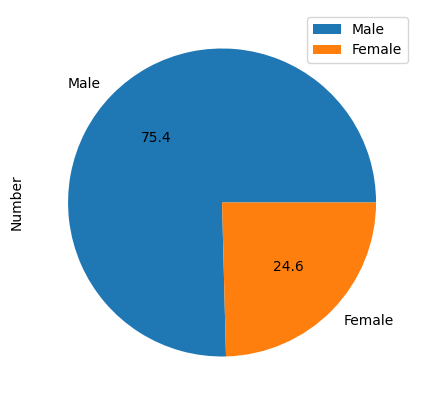

In [9]:
# Analyzing gender density - approach1
genderData=pd.DataFrame({'Number':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
genderData

# Plotting on a pie chart
genderData.plot.pie(y='Number',figsize=(5,5),autopct='%.1f')

<Axes: xlabel='Gender'>

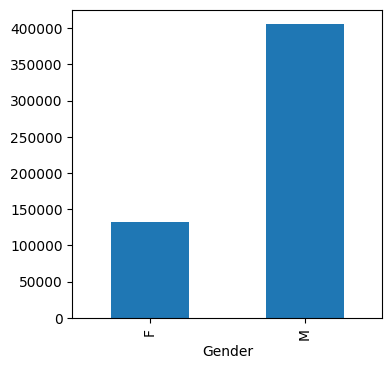

In [10]:
# Analyzing gender density - approach2 (using groupby())
df.groupby('Gender').size().plot(kind='bar',figsize=(4,4))

<Axes: ylabel='Purchase'>

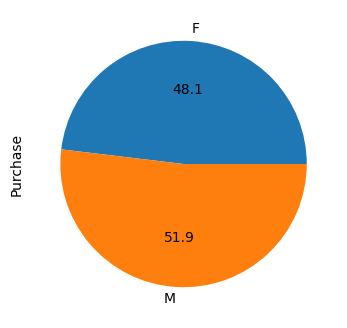

In [11]:
# Calculating average purchase of each gender:
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct='%0.1f',figsize=(4,4))

INFERENCE1: From the analysis of gender, we can infer that male dominance and male purchasing power are greater than the females.

<Axes: title={'center': 'Age Distribution'}, xlabel='Age'>

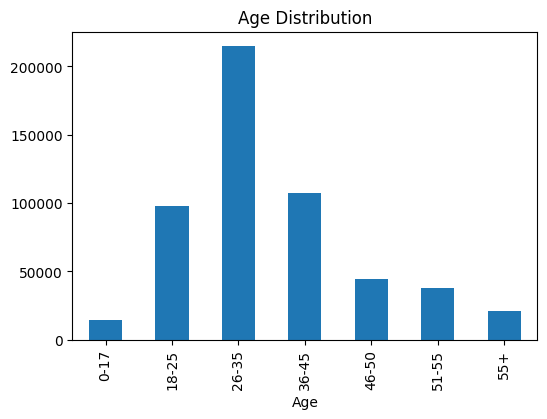

In [12]:
# Analyzing age
df.groupby('Age').size().plot(kind='bar',figsize=(6,4),title='Age Distribution')

<Axes: xlabel='Age'>

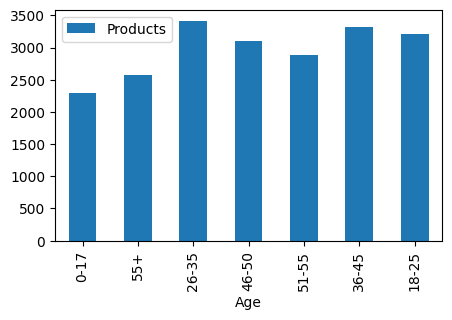

In [13]:
# Analyzing how many unique products are purchased based on the age
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
ageData=pd.DataFrame(lst,columns=['Age','Products'])
ageData.plot(kind='bar',x='Age',figsize=(5,3))

<Axes: title={'center': 'Amount spent by age'}, xlabel='Age'>

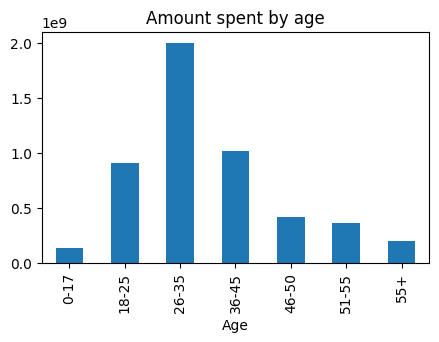

In [14]:
# Analyzing how much money spent on the products based on age
df.groupby('Age')['Purchase'].sum().plot(kind='bar',figsize=(5,3),title='Amount spent by age')


<Axes: >

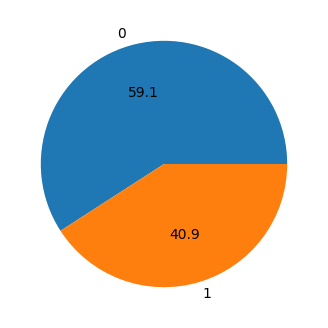

In [15]:
# Analyzing marital status
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%0.1f',figsize=(4,4))

INFERENCE2: From the analysis of age, we can infer that age groups belonging to 26-35 have the greatest purchasing power, followed by 36-45 and 18-25 age groups. From the analysis of marital status, unmarried are the greater purchasers than the married ones.

<Axes: xlabel='Age', ylabel='count'>

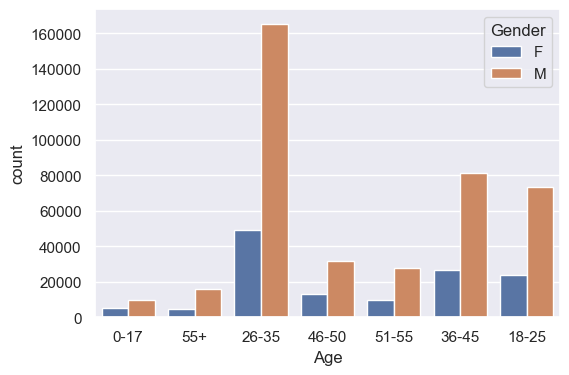

In [16]:
# Multi-column analysis

# Age and Gender Analysis
sns.set(rc = {'figure.figsize':(6,4)})
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

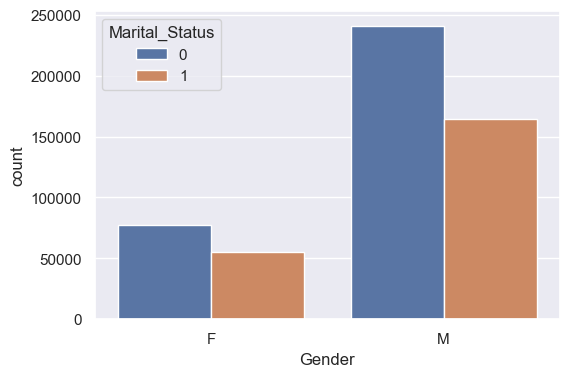

In [17]:
# Gender and Marital status Analysis
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

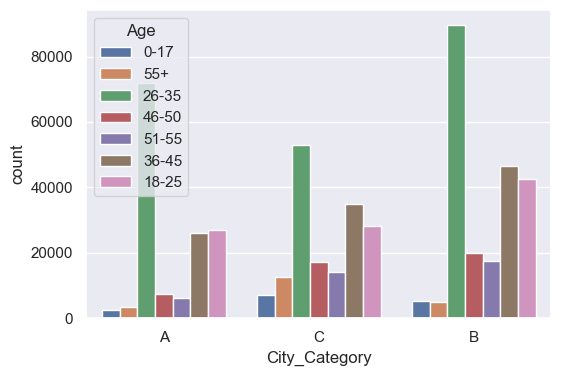

In [18]:
# City category and Age Analysis
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

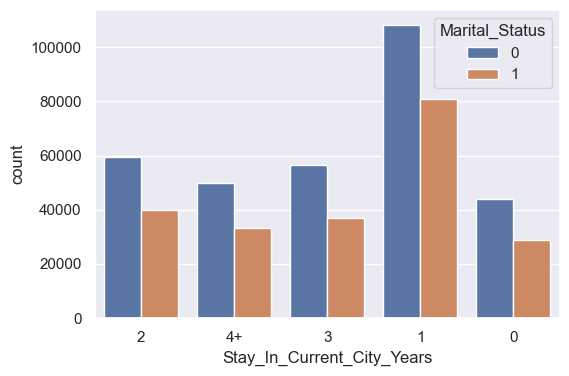

In [19]:
# Stay in current city (years) and Marital Status
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)


<Axes: xlabel='Occupation'>

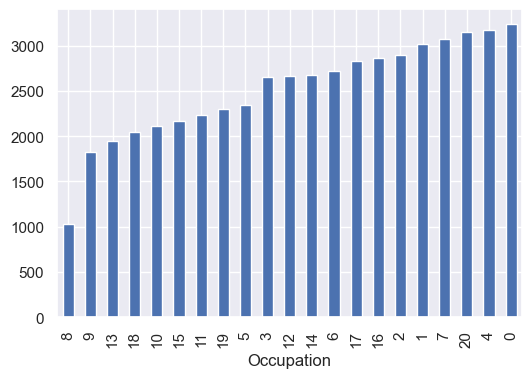

In [20]:
# Occupation and Product Analysis
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

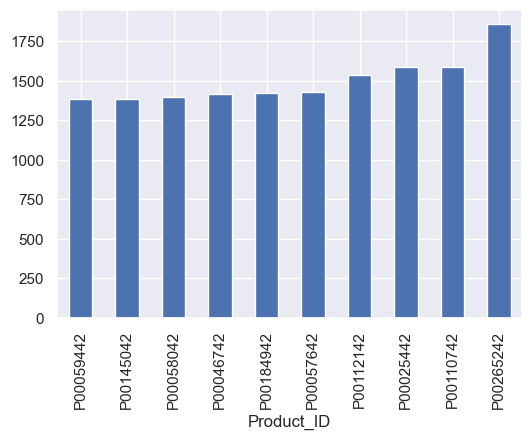

In [21]:
# Top 10 products purchased
df.groupby('Product_ID')['Purchase'].size().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='MaritalStatus&Gender', ylabel='count'>

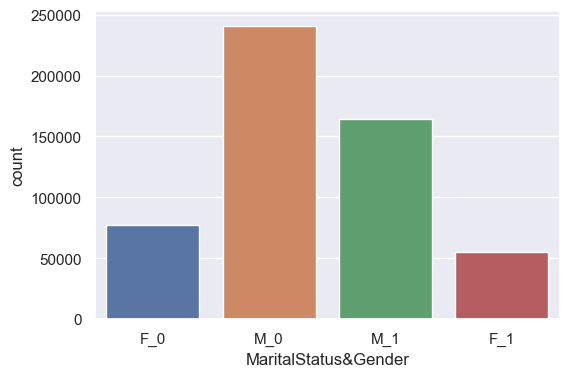

In [24]:
# Gender and Marital status Analysis
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['MaritalStatus&Gender']=l
sns.countplot(x=df['MaritalStatus&Gender'])

<Axes: xlabel='Age', ylabel='count'>

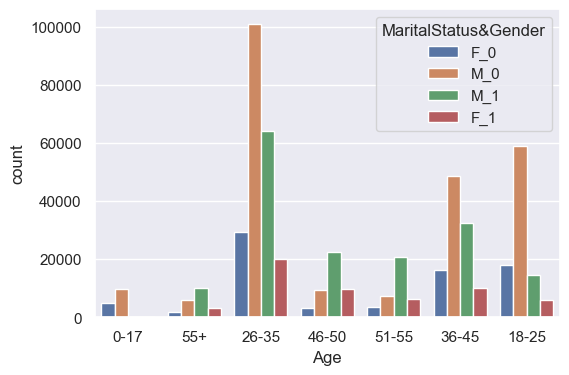

In [25]:
sns.countplot(x=df['Age'],hue=df['MaritalStatus&Gender'])

INFERENCE3: From the combined analysis of gender, marital status and age, we can infer that unmarried male within the age group of 26-35 are the greatest purchasers, considering them as a potential target audience.